In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:


# Load data
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]




In [3]:
df = pd.read_csv('mushroom.csv', names=columns)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
print(df.head())
print(df.columns.tolist())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [9]:
df['class'].value_counts()


class
e    4208
p    3916
Name: count, dtype: int64

In [11]:
#veil-type column has only single category 
print(df['veil-type'].value_counts())
print("\nUnique values:", df['veil-type'].unique())
print("\nNumber of unique values:", df['veil-type'].nunique())


veil-type
p    8124
Name: count, dtype: int64

Unique values: ['p']

Number of unique values: 1


In [13]:
#so dropping the veil-type column inorder to simplify the dataset
df.drop('veil-type', axis=1, inplace=True)


In [15]:
df['stalk-root']


0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

In [17]:
df['odor']

0       p
1       a
2       l
3       p
4       n
       ..
8119    n
8120    n
8121    n
8122    y
8123    n
Name: odor, Length: 8124, dtype: object

In [19]:
df['odor'].isna().sum()


0

In [21]:
import numpy as np

# Step 1: Replace '?' with NaN
df['stalk-root'] = df['stalk-root'].replace('?', pd.NA)

# Step 2: Show only the missing values in the 'stalk-root' column
print(df.loc[df['stalk-root'].isna(), 'stalk-root'])


3984    <NA>
4023    <NA>
4076    <NA>
4100    <NA>
4104    <NA>
        ... 
8119    <NA>
8120    <NA>
8121    <NA>
8122    <NA>
8123    <NA>
Name: stalk-root, Length: 2480, dtype: object


In [23]:
print(df['stalk-root'].isna().sum())


2480


In [25]:
#try training and testing because to decide whether to drop the column stalk-root or not 

In [27]:



# Option 1: For "with stalk-root" approach, fill missing as 'missing'
df_with = df.copy()
df_with['stalk-root'].fillna('missing', inplace=True)

# Option 2: For "without stalk-root" approach, drop the column
df_without = df.copy()
df_without.drop(columns=['stalk-root'], inplace=True)

# Encode categorical variables (label encoding)
def encode_df(dataframe):
    le = LabelEncoder()
    for col in dataframe.columns:
        dataframe[col] = le.fit_transform(dataframe[col])
    return dataframe

df_with = encode_df(df_with)
df_without = encode_df(df_without)


In [29]:
X_with = df_with.drop('class', axis=1)
y_with = df_with['class']

X_without = df_without.drop('class', axis=1)
y_without = df_without['class']



In [31]:
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(
    X_with, y_with, test_size=0.2, random_state=42
)

X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(
    X_without, y_without, test_size=0.2, random_state=42
)


In [33]:
model_with = RandomForestClassifier(random_state=42)
model_with.fit(X_train_with, y_train_with)

model_without = RandomForestClassifier(random_state=42)
model_without.fit(X_train_without, y_train_without)


RandomForestClassifier(random_state=42)

In [35]:
y_pred_with = model_with.predict(X_test_with)
acc_with = accuracy_score(y_test_with, y_pred_with)

y_pred_without = model_without.predict(X_test_without)
acc_without = accuracy_score(y_test_without, y_pred_without)

print(f"Accuracy with stalk-root: {acc_with:.4f}")
print(f"Accuracy without stalk-root: {acc_without:.4f}")


Accuracy with stalk-root: 1.0000
Accuracy without stalk-root: 1.0000


In [37]:
#cross validation 

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Using 5-fold cross-validation on full data (with stalk-root filled)
scores = cross_val_score(rf, X_with, y_with, cv=5, scoring='accuracy')

print(f"Cross-validation accuracies: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


Cross-validation accuracies: [0.84246154 1.         1.         1.         0.72352217]
Mean CV accuracy: 0.9132


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# With stalk-root
y_pred_with = model_with.predict(X_test_with)
print("=== With stalk-root ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_with, y_pred_with))
print("\nClassification Report:")
print(classification_report(y_test_with, y_pred_with))

# Without stalk-root
y_pred_without = model_without.predict(X_test_without)
print("\n=== Without stalk-root ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_without, y_pred_without))
print("\nClassification Report:")
print(classification_report(y_test_without, y_pred_without))


=== With stalk-root ===
Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


=== Without stalk-root ===
Confusion Matrix:
[[843   0]
 [  0 782]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



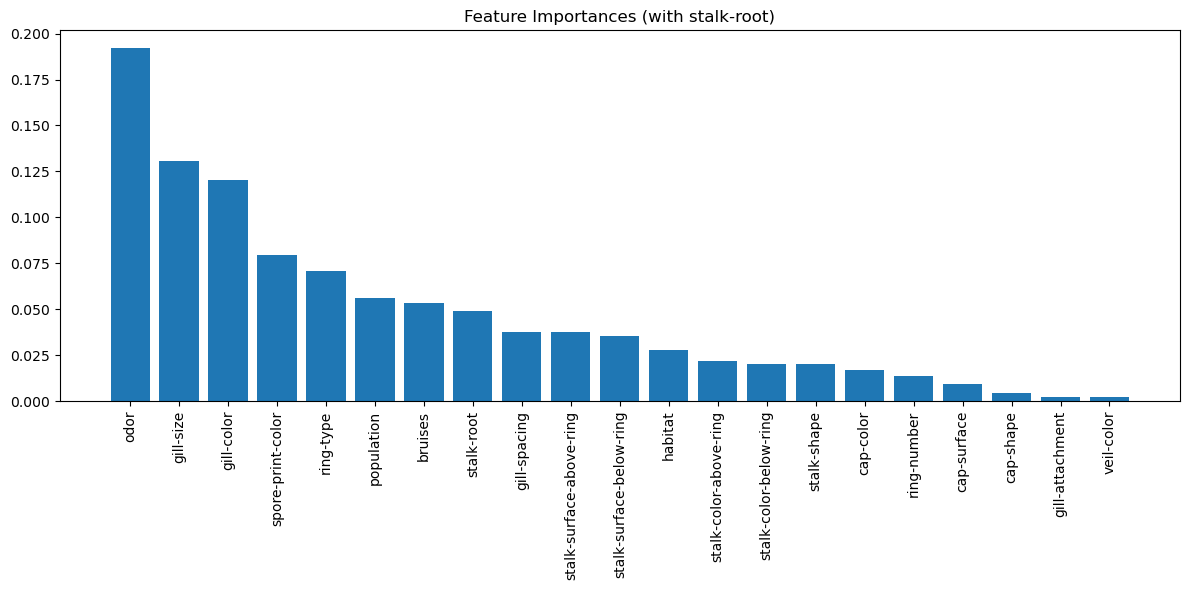

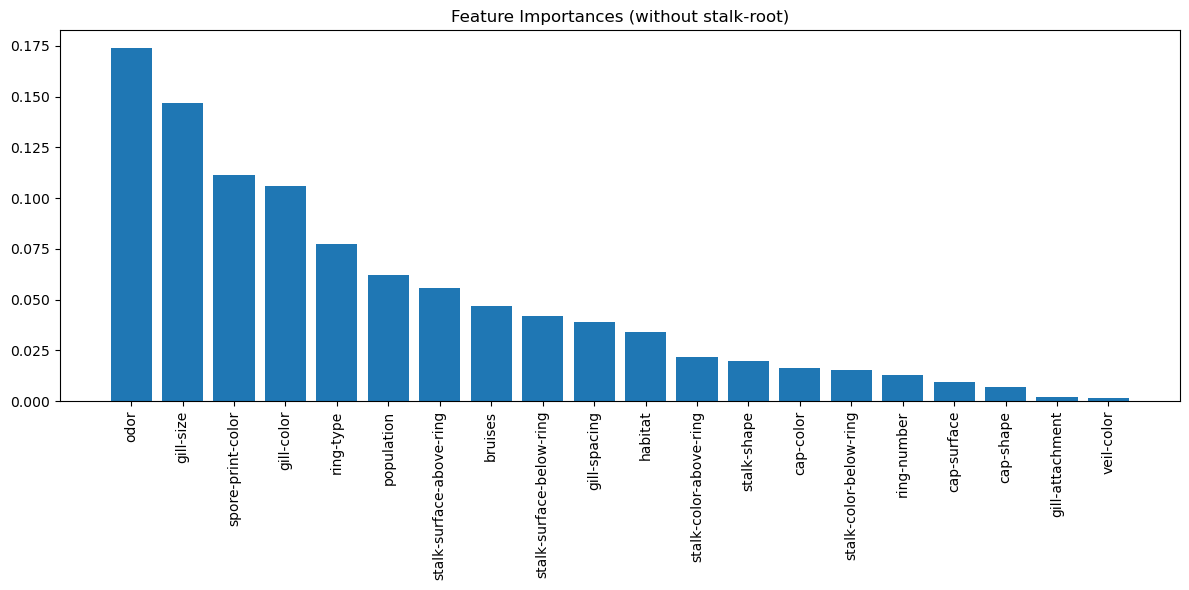

In [41]:

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model WITH stalk-root
importances = model_with.feature_importances_
features = X_with.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances (with stalk-root)")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


# Now for WITHOUT stalk-root
importances_wo = model_without.feature_importances_
features_wo = X_without.columns

indices_wo = np.argsort(importances_wo)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances (without stalk-root)")
plt.bar(range(len(features_wo)), importances_wo[indices_wo], align='center')
plt.xticks(range(len(features_wo)), [features_wo[i] for i in indices_wo], rotation=90)
plt.tight_layout()
plt.show()


In [43]:
#dropping the column which has 30% of missing values and less than 0.5% prective feature
df.drop('stalk-root', axis=1, inplace=True)


In [45]:
'stalk-root' in df.columns


False

In [47]:
#Label Encoding (convert text to numbers)
df_encoded = df.apply(LabelEncoder().fit_transform)


In [49]:
#Split features (X) and target (y)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']


In [51]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
#evaluate the model's average performance.
knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, X, y, cv=10)
print("KNN 10-fold CV Accuracy: ", cv_scores.mean())


KNN 10-fold CV Accuracy:  0.9483140348644865


In [55]:
#predictions from KNN on test set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [57]:
#predictions from Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [59]:
#full performance comparison between KNN and Random Forest

# KNN Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


KNN Accuracy: 0.9956923076923077
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [62]:
print("Confusion Matrix RandomForest:\n", confusion_matrix(y_test, y_pred_rf))


Confusion Matrix RandomForest:
 [[843   0]
 [  0 782]]


In [64]:
print("Confusion Matrix KNN:\n", confusion_matrix(y_test, y_pred_knn))


Confusion Matrix KNN:
 [[836   7]
 [  0 782]]
